In [1]:
%pip install mtcnn facenet-pytorch pillow opencv-python seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt

2025-07-05 19:00:40.217037: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-07-05 19:00:40.217066: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-05 19:00:40.217072: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1751734840.217660 5752572 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751734840.218336 5752572 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


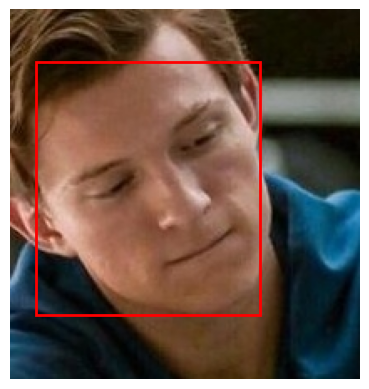

In [3]:
import matplotlib.patches as patches
from mtcnn import MTCNN

# Function to perform face detection and display the image with bounding boxes
def detect_and_display_faces(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to RGB for compatibility with MTCNN
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Load the pre-trained MTCNN model
    detector = MTCNN()
    
    # Perform face detection
    faces = detector.detect_faces(img_rgb)
    
    # Display the original image
    fig, ax = plt.subplots()
    ax.imshow(img_rgb)
    
    # Add bounding boxes for each detected face
    for face in faces:
        x, y, w, h = face['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.axis('off')
    plt.show()

# Specify the path to the main directory
main_directory = os.path.join('./data/105_classes_pins_dataset')

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick a folder
selected_folder = random.choice(all_folders)
folder_path = os.path.join(main_directory, selected_folder)

# Get a list of all images in the selected folder
all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Randomly pick an image from the folder
selected_image = random.choice(all_images)
image_path = os.path.join(folder_path, selected_image)

# Perform face detection using MTCNN and display the result
detect_and_display_faces(image_path)

In [4]:
import os
import shutil

# Set the directory path
directory_path = './data/working/'

# Remove all files and subdirectories in the directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("Contents of the working directory cleared.")

Contents of the working directory cleared.


## copying around 100 images to apply pre processing and then train test split

In [5]:
import shutil

# Source directory
source_directory = './data/105_classes_pins_dataset'

# Destination directory
destination_directory = './data/working/'

# Create train and test directories if not exist
train_directory = os.path.join(destination_directory, 'train')
os.makedirs(train_directory, exist_ok=True)


# Get a list of all folders in the source directory
all_folders = [folder for folder in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, folder))]

# Iterate through each folder
for folder in all_folders:
    folder_path = os.path.join(source_directory, folder)
    
    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    
    # Create a label for the folder (drop the first 5 characters)
    label = folder[5:]
    
    # Shuffle the images
    random.shuffle(all_images)
    
    # Move the first 85 images to the train directory
    for i in range(85):
        image_path = os.path.join(folder_path, all_images[i])
        destination_path = os.path.join(train_directory, label, all_images[i])
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(image_path, destination_path)
    

print("Data splitting completed.")

Data splitting completed.


## using mtcnn detcting the face bounding box and then finding the face meta data

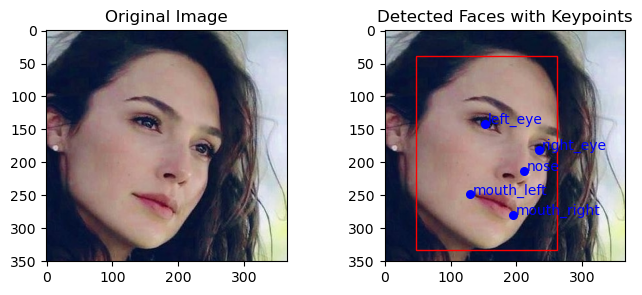

Metadata of detected faces in gal gadot/gal gadot20_1749.jpg:
Face 1:
   Confidence: 1.00
   Bounding Box: [47, 38, 214, 295]
   Keypoints: {'nose': [211, 213], 'mouth_right': [194, 280], 'right_eye': [234, 181], 'left_eye': [152, 142], 'mouth_left': [129, 249]}



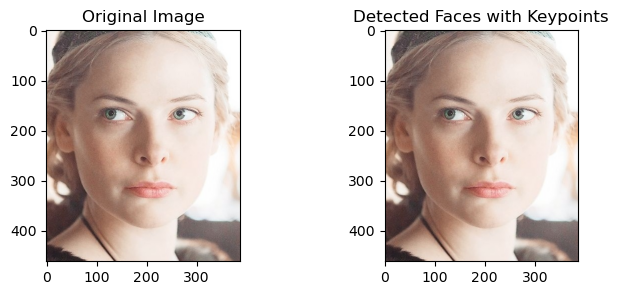

Metadata of detected faces in Rebecca Ferguson/Rebecca Ferguson101_334.jpg:


In [6]:
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# Directory paths
train_directory = './data/working/train'

# Get a list of all folders in the train directory
all_folders = [folder for folder in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, folder))]

# Randomly select two folders
selected_folders = random.sample(all_folders, 2)

# Initialize MTCNN detector
detector = MTCNN()

# Iterate through selected folders
for folder in selected_folders:
    folder_path = os.path.join(train_directory, folder)
    
    # Get a list of all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    
    # Randomly select one image
    selected_image = random.choice(all_images)
    image_path = os.path.join(folder_path, selected_image)
    
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect faces using MTCNN
    faces = detector.detect_faces(image)
    
    # Display image with bounding boxes around detected faces
    plt.figure(figsize=(8, 3))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    
    # Display image with bounding boxes
    plt.subplot(1, 2, 2)
    plt.imshow(image_rgb)
    
    for face in faces:
        x, y, width, height = face['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        plt.gca().add_patch(rect)
        
        # Display additional keypoints
        for key, value in face['keypoints'].items():
            plt.scatter(value[0], value[1], s=30, color='blue', marker='o')
            plt.text(value[0] + 5, value[1], key, color='blue')
    
    plt.title('Detected Faces with Keypoints')
    plt.show()

    # Display metadata of detected faces
    print(f"Metadata of detected faces in {folder}/{selected_image}:")
    for i, face in enumerate(faces):
        print(f"Face {i + 1}:")
        print(f"   Confidence: {face['confidence']:.2f}")
        print(f"   Bounding Box: {face['box']}")
        print(f"   Keypoints: {face['keypoints']}")
        print()

## showing the embeddings of the detected face using VGGface

/opt/miniconda3/envs/biometric/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


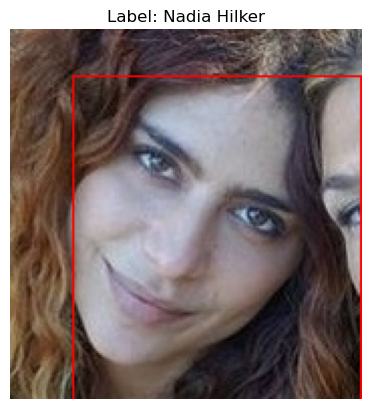

Embeddings for Detected Face 1: [ 4.94090617e-02 -4.80452145e-04  4.74014208e-02  2.99472194e-02
  4.64243405e-02 -4.07394730e-02 -2.04351172e-02 -6.67351065e-03
 -6.76239189e-03 -4.00666259e-02 -7.90032372e-02 -3.34416926e-02
 -8.62756595e-02 -1.22505007e-02  7.07236975e-02 -6.03452325e-02
 -5.73233189e-03 -3.00659742e-02  3.62641737e-02  1.86350662e-02
  1.16201611e-02  2.35779434e-02 -4.68547083e-02  9.98427253e-03
  1.92570295e-02 -3.25398427e-03  1.08300857e-01 -3.71711655e-03
  2.37193070e-02 -8.22408050e-02 -3.12758540e-03  5.42536415e-02
  2.54395045e-02  1.82997603e-02  5.02266623e-02  3.05155321e-04
 -6.96391985e-02  3.93629223e-02 -3.28179859e-02  2.32312214e-02
 -2.23919377e-03  1.38829006e-02  4.66179429e-03 -9.89030600e-02
 -1.15957549e-02 -6.00158200e-02  2.70310715e-02 -1.03436327e-02
 -3.95041630e-02  1.60502866e-02  1.05825491e-01  8.21413919e-02
  6.42516091e-02  6.36910275e-02 -2.60112982e-04 -3.20883952e-02
  4.34598401e-02  7.79154822e-02  5.94321266e-03  3.043381

In [7]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image

# Function to process image, detect face, and calculate embeddings
def process_image(image_path, face_detector, face_embedder, label):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    boxes, probs = face_detector.detect(image_rgb)

    if boxes is not None:
        # Display label of the image using the folder it is picked up from
        plt.title(f"Label: {label}")

        # Display original image
        plt.imshow(Image.fromarray(image_rgb))

        # Draw a rectangle around each detected face on the original image
        for i, box in enumerate(boxes):
            x, y, w, h = box
            # Draw a rectangle around the detected face with thinner lines
            cv2.rectangle(image_rgb, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 1)

        # Display the image with the rectangles around detected faces
        plt.imshow(Image.fromarray(image_rgb))

        plt.axis('off')
        plt.show()

        # Apply transformations and normalization
        transformed_faces = [face_embedder(extract_face(image_rgb, box).unsqueeze(0)) for box in boxes]

        # Convert PyTorch tensor to NumPy array
        transformed_faces_np = [transformed_face.squeeze().detach().numpy() for transformed_face in transformed_faces]

        # Print the embeddings
        for i, embeddings in enumerate(transformed_faces_np):
            print(f"Embeddings for Detected Face {i + 1}:", embeddings)

# Directory paths
train_directory = './data/working/train/'

# Randomly pick a folder
selected_folder = random.choice(os.listdir(train_directory))
selected_folder_path = os.path.join(train_directory, selected_folder)

# Randomly pick one file from the selected folder
file = random.choice(os.listdir(selected_folder_path))
file_path = os.path.join(selected_folder_path, file)

# Initialize MTCNN for face detection with adjusted parameters
face_detector = MTCNN(margin=20, post_process=False, select_largest=False)
   
# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process image, detect faces, calculate embeddings, and display results
process_image(file_path, face_detector, face_embedder, label=selected_folder)

## eucledian distance between 2 embeddings for different persons

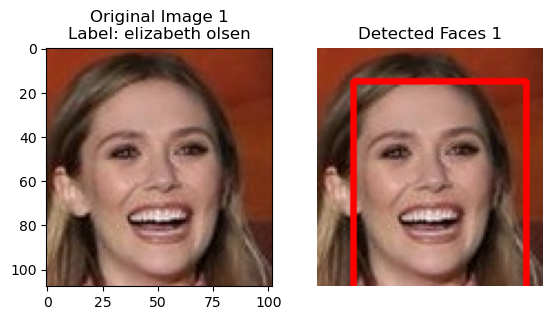

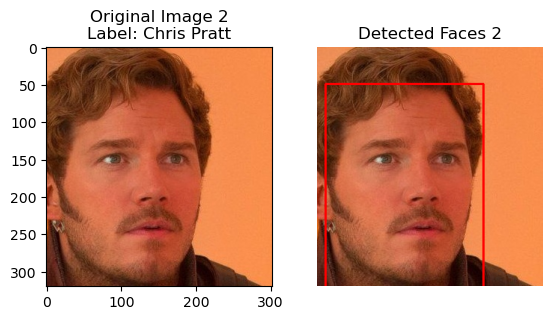

Distance between embeddings: 0.3493


In [8]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Function to process images, detect faces, and calculate embeddings
def process_images(folder_path1, file1, folder_path2, file2, face_detector, face_embedder):
    # Read the images
    image1_path = os.path.join(folder_path1, file1)
    image2_path = os.path.join(folder_path2, file2)

    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    # Get labels from folder names
    label1 = os.path.basename(folder_path1)
    label2 = os.path.basename(folder_path2)

    # Display original images with rectangles around detected faces
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Original Image 1\nLabel: {label1}")

    for i, face in enumerate(faces1):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Detected Faces 1")
    plt.axis('off')

    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Original Image 2\nLabel: {label2}")

    for i, face in enumerate(faces2):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Detected Faces 2")
    plt.axis('off')

    plt.show()

    # Calculate embeddings for the first image
    embeddings1 = [face_embedder(extract_face(image1_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces1]

    # Print the embeddings for the first image
    #for i, embeddings in enumerate(embeddings1):
     #   print(f"Embeddings for Detected Face {i + 1} in Image 1:", embeddings)

    # Calculate embeddings for the second image
    embeddings2 = [face_embedder(extract_face(image2_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces2]

    # Print the embeddings for the second image
   # for i, embeddings in enumerate(embeddings2):
    #    print(f"Embeddings for Detected Face {i + 1} in Image 2:", embeddings)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1[0].reshape(1, -1), embeddings2[0].reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_directory = './data/working/train/'

# Randomly pick two folders
selected_folders = random.sample(os.listdir(train_directory), 2)

# Randomly pick one file from each selected folder
file1 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[1])))

# Initialize MTCNN for face detection
face_detector = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process images, detect faces, calculate embeddings, and display results
process_images(
    os.path.join(train_directory, selected_folders[0]),
    file1,
    os.path.join(train_directory, selected_folders[1]),
    file2,
    face_detector,
    face_embedder
)

## eucledian distance between 2 embeddings for same person

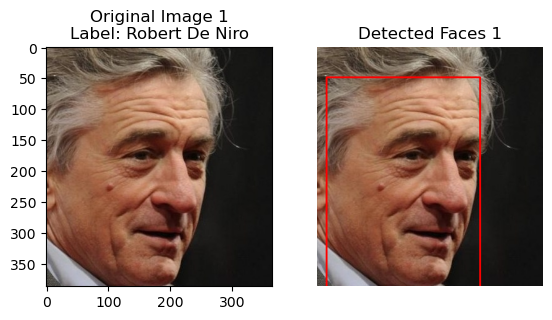

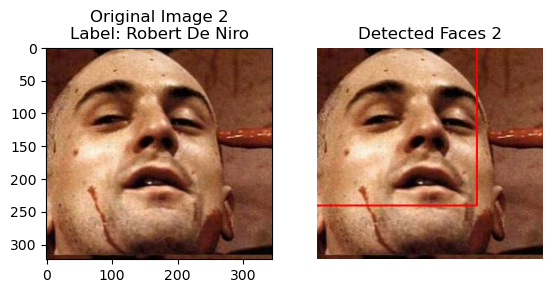

Distance between embeddings: 0.3709


In [9]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Function to process images, detect faces, and calculate embeddings
def process_images(folder_path, face_detector, face_embedder):
    # Randomly pick two files from the selected folder
    files = random.sample(os.listdir(folder_path), 2)
    
    # Read the images
    image1_path = os.path.join(folder_path, files[0])
    image2_path = os.path.join(folder_path, files[1])

    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    # Get the label from the folder name
    label = os.path.basename(folder_path)

    # Display original images with rectangles around detected faces
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Original Image 1\nLabel: {label}")

    for i, face in enumerate(faces1):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Detected Faces 1")
    plt.axis('off')

    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Original Image 2\nLabel: {label}")

    for i, face in enumerate(faces2):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Detected Faces 2")
    plt.axis('off')

    plt.show()

    # Calculate embeddings for the first image
    embeddings1 = [face_embedder(extract_face(image1_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces1]

    # Print the embeddings for the first image
    #for i, embeddings in enumerate(embeddings1):
     #   print(f"Embeddings for Detected Face {i + 1} in Image 1:", embeddings)

    # Calculate embeddings for the second image
    embeddings2 = [face_embedder(extract_face(image2_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces2]

    # Print the embeddings for the second image
   # for i, embeddings in enumerate(embeddings2):
    #    print(f"Embeddings for Detected Face {i + 1} in Image 2:", embeddings)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1[0].reshape(1, -1), embeddings2[0].reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_directory = './data/working/train/'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_directory))
selected_folder_path = os.path.join(train_directory, selected_folder)

# Initialize MTCNN for face detection
face_detector = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process images, detect faces, calculate embeddings, and display results
process_images(selected_folder_path, face_detector, face_embedder)

In [10]:
import os
import shutil

# Set the directory path
directory_path = './data/working/train_detected_faces'

# Check if the directory exists
if not os.path.exists(directory_path):
    # If it doesn't exist, create it
    os.makedirs(directory_path)
    print(f"Directory created: '{directory_path}'")
else:
    # If it exists, clear its contents
    print(f"Directory '{directory_path}' already exists. Clearing its contents.")
    
    # Loop through all items in the directory to delete them
    for item_name in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item_name)
        try:
            if os.path.isfile(item_path) or os.path.islink(item_path):
                os.unlink(item_path)
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)
        except Exception as e:
            print(f'Failed to delete {item_path}. Reason: {e}')
            
    print("Contents of directory cleared successfully.")

Directory created: './data/working/train_detected_faces'


In [11]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN

data_directory = './data/working/train'
output_directory = './data/working/train_detected_faces'

def detect_faces_and_save_with_mtcnn(image_paths, output_directory):
    processed_images = []
    images_without_faces = 0
    # Initialize the MTCNN detector
    detector = MTCNN()

    for i, image_path in enumerate(image_paths):
        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            images_without_faces += 1
            continue

        # Convert BGR (OpenCV default) to RGB for MTCNN
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Detect faces
        faces = detector.detect_faces(img_rgb)

        if faces:
            # Get bounding box of the first detected face
            x, y, w, h = faces[0]['box']
            # Ensure coordinates are non-negative
            x, y = max(0, x), max(0, y)
            
            # Crop the face from the original BGR image
            face_roi = img[y:y+h, x:x+w]
            
            # Resize the face to the desired dimensions
            resized_face = cv2.resize(face_roi, (224, 224))

            # --- Saving Logic (same as before) ---
            folder_name = os.path.basename(os.path.dirname(image_path))
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)
            
            output_path = os.path.join(output_folder, f"detected_face_{i}.jpg")
            cv2.imwrite(output_path, resized_face)

            processed_images.append(resized_face)
        else:
            images_without_faces += 1

        if (i + 1) % 50 == 0:
            print(f"{i+1}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without faces detected/Total images: {images_without_faces}/{len(image_paths)}")
    return np.array(processed_images)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get list of all image paths
all_image_paths = []
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

# Run the face detection
X_all_processed = detect_faces_and_save_with_mtcnn(all_image_paths, output_directory)

print("Face detection complete.")



8900/8925 images processed
Images without faces detected/Total images: 59/8925
Face detection complete.


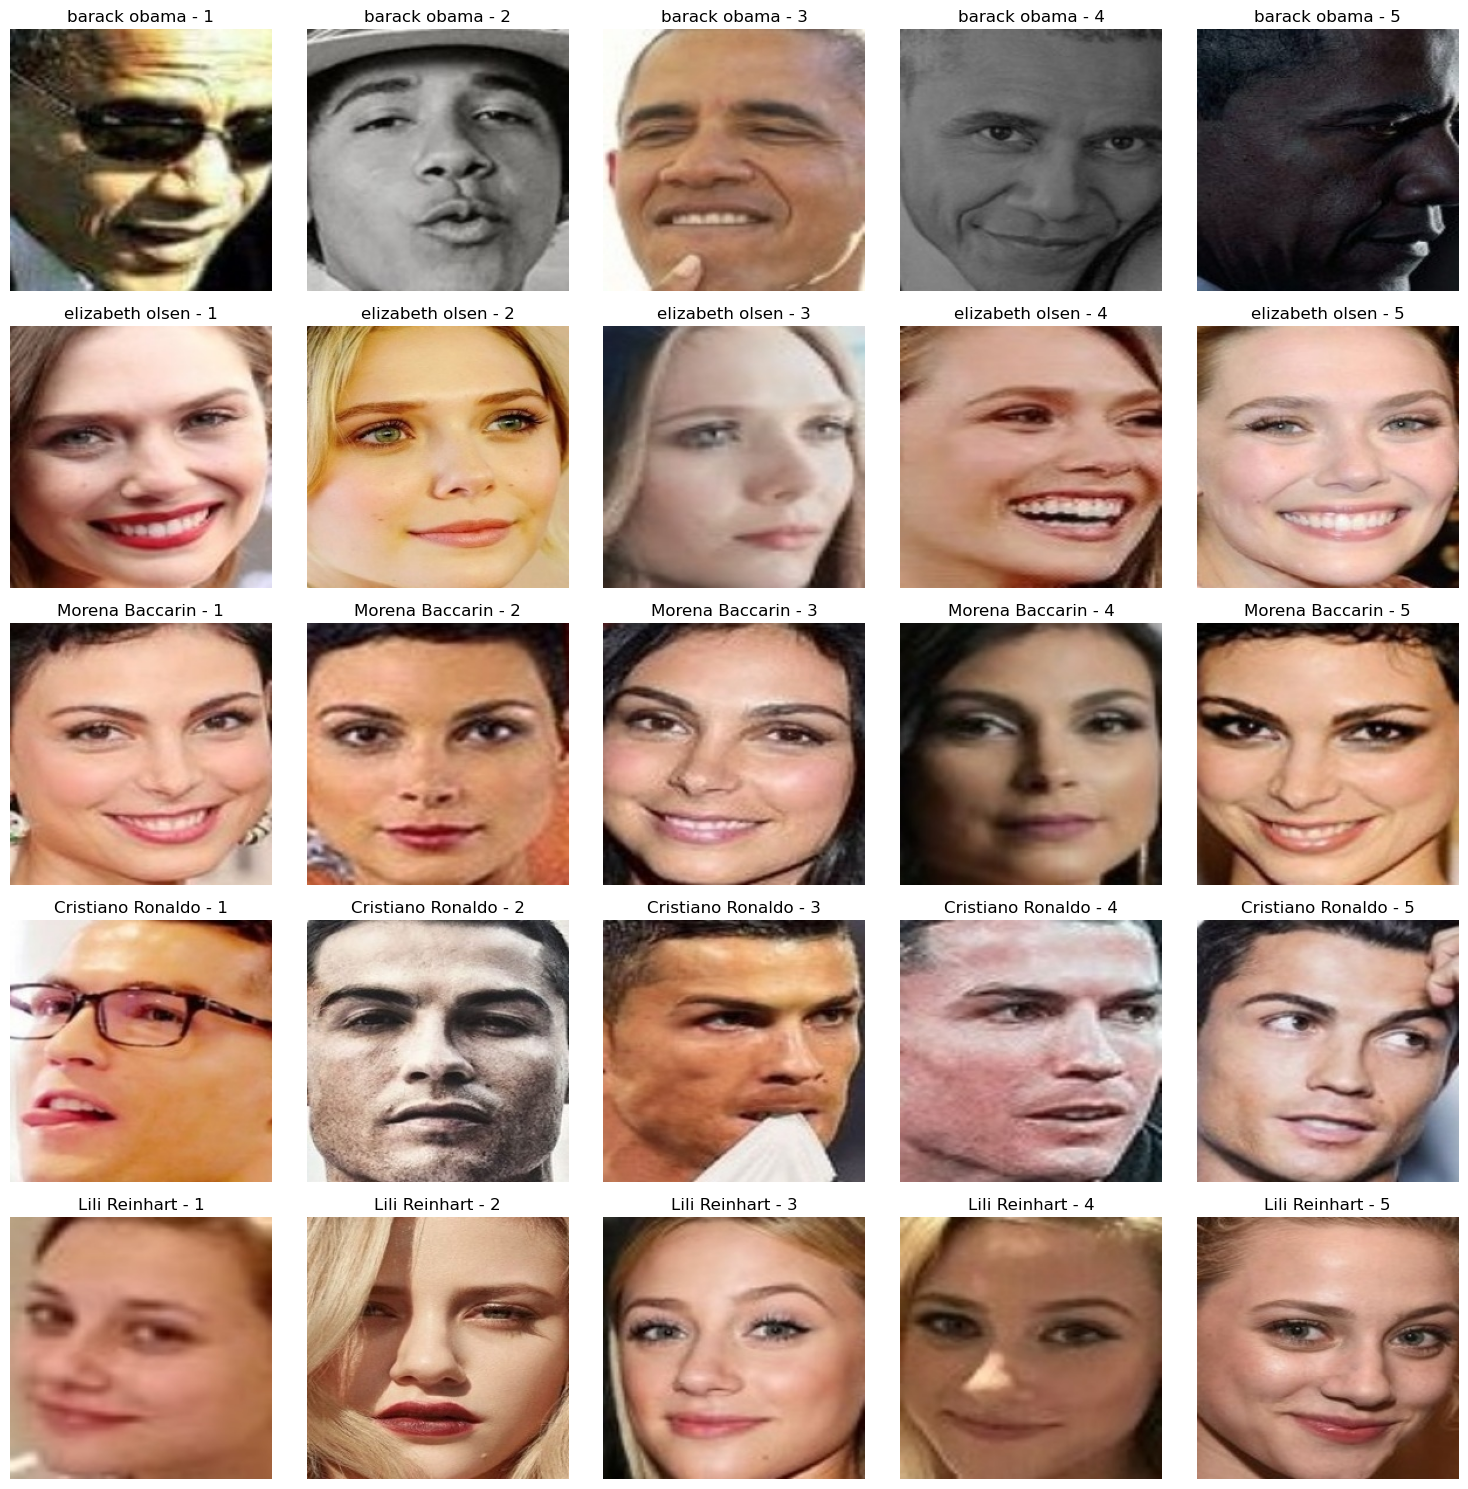

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your detected faces directory
output_directory = './data/working/train_detected_faces'

# Get a list of subdirectories (folders) in the output directory
folders = [f for f in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, f))]

# Randomly pick five folders
selected_folders = np.random.choice(folders, size=5, replace=False)

# Set up the subplot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, folder_name in enumerate(selected_folders):
    folder_path = os.path.join(output_directory, folder_name)
    image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)[:5]]

    for j, image_path in enumerate(image_paths):
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{folder_name} - {j+1}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## again check for eucledian distance
1. b/w different faces
2. b/w same face

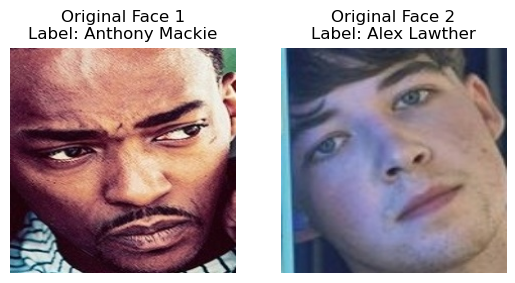

Distance between embeddings: 1.3870


In [13]:
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(face1_path, face2_path, face_embedder):
    # Read the pre-detected face images
    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Get labels from folder names
    label1 = os.path.basename(os.path.dirname(face1_path))
    label2 = os.path.basename(os.path.dirname(face2_path))

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nLabel: {label1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nLabel: {label2}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = './data/working/train_detected_faces/'

# Randomly pick two folders
selected_folders = random.sample(os.listdir(train_detected_faces_directory), 2)

# Randomly pick one file from each selected folder
file1 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[1])))

# Full paths for the selected faces
face1_path = os.path.join(train_detected_faces_directory, selected_folders[0], file1)
face2_path = os.path.join(train_detected_faces_directory, selected_folders[1], file2)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process face images, calculate embeddings, and display results
process_images(face1_path, face2_path, face_embedder)

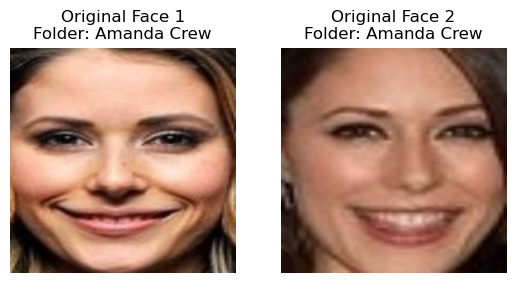

Distance between embeddings: 0.7237


In [14]:
import os
import random
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(folder_path, face1_file, face2_file, face_embedder):
    # Read the pre-detected face images
    face1_path = os.path.join(folder_path, face1_file)
    face2_path = os.path.join(folder_path, face2_file)

    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = './data/working/train_detected_faces/'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_detected_faces_directory))
folder_path = os.path.join(train_detected_faces_directory, selected_folder)

# Randomly pick two different files from the selected folder
files = random.sample(os.listdir(folder_path), 2)
face1_file, face2_file = files

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process face images, calculate embeddings, and display results
process_images(folder_path, face1_file, face2_file, face_embedder)

# EXTRACTING THE EMBEDDINGS

In [15]:
import shutil
import os

folder_path = './data/working/extracted_embeddings'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder ./data/working/extracted_embeddings does not exist.


In [16]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import torch.backends
from torchvision import transforms
from tqdm import tqdm

# Function to extract embeddings from a single folder with data augmentation
def extract_embeddings_from_folder(folder_path, face_embedder, device, output_directory):
    embeddings = {}
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ])

    label = os.path.basename(folder_path)  # Get the label from the folder name

    for image_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_name)
        try:
            img = Image.open(image_path)

            # Convert image to tensor
            img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)

            # Calculate embedding
            embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
            embeddings[image_name] = embedding

            # Save the embedding for the original image
            output_emb_path = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_embedding.npy")
            np.save(output_emb_path, embedding)

            # Apply data augmentation
            augmented_img = data_transform(img)

            # Convert augmented image to tensor
            img_tensor_augmented = augmented_img.unsqueeze(0).float().to(device)

            # Calculate embedding for the augmented image
            embedding_augmented = face_embedder(img_tensor_augmented).squeeze().detach().cpu().numpy()
            embeddings[f"{os.path.splitext(image_name)[0]}_augmented_embedding.npy"] = embedding_augmented

            # Save the embedding for the augmented image
            output_emb_path_augmented = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_augmented_embedding.npy")
            np.save(output_emb_path_augmented, embedding_augmented)

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

    return label, embeddings

# Directory paths
input_directory = './data/working/train_detected_faces'
output_directory = './data/working/extracted_embeddings'

# Initialize InceptionResnetV1 for face embedding
# device = 'cpu'
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loop through each folder in the input directory
for folder_name in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, folder_name)

    # Create subfolder in output_directory for the current label
    label_output_directory = os.path.join(output_directory, folder_name)
    os.makedirs(label_output_directory, exist_ok=True)

    # Extract embeddings from the current folder with data augmentation
    label, embeddings = extract_embeddings_from_folder(folder_path, face_embedder, device, label_output_directory)

print("Embeddings extraction complete.")

mps


Processing ./data/working/train_detected_faces/Rebecca Ferguson: 100%|██████████| 85/85 [00:04<00:00, 17.52it/s]
Processing ./data/working/train_detected_faces/Zendaya: 100%|██████████| 84/84 [00:04<00:00, 19.18it/s]
Processing ./data/working/train_detected_faces/Lionel Messi: 100%|██████████| 85/85 [00:04<00:00, 19.63it/s]
Processing ./data/working/train_detected_faces/Henry Cavil: 100%|██████████| 84/84 [00:05<00:00, 14.73it/s]
Processing ./data/working/train_detected_faces/Madelaine Petsch: 100%|██████████| 85/85 [00:05<00:00, 15.51it/s]
Processing ./data/working/train_detected_faces/Robert Downey Jr: 100%|██████████| 85/85 [00:05<00:00, 14.93it/s]
Processing ./data/working/train_detected_faces/Jake Mcdorman: 100%|██████████| 85/85 [00:04<00:00, 17.28it/s]
Processing ./data/working/train_detected_faces/Tuppence Middleton: 100%|██████████| 85/85 [00:04<00:00, 18.71it/s]
Processing ./data/working/train_detected_faces/Josh Radnor: 100%|██████████| 85/85 [00:04<00:00, 18.53it/s]
Process

Embeddings extraction complete.


In [17]:
import os

# Directory path
output_directory = './data/working/extracted_embeddings'

# Get folder names and file counts
folders_and_counts = [(folder, len(os.listdir(os.path.join(output_directory, folder)))) for folder in os.listdir(output_directory)]

# Print results
for folder, count in folders_and_counts:
    print(f"Folder: {folder}, Number of Files: {count}")

Folder: Rebecca Ferguson, Number of Files: 170
Folder: Zendaya, Number of Files: 168
Folder: Lionel Messi, Number of Files: 170
Folder: Henry Cavil, Number of Files: 168
Folder: Madelaine Petsch, Number of Files: 170
Folder: Robert Downey Jr, Number of Files: 170
Folder: Jake Mcdorman, Number of Files: 170
Folder: Tuppence Middleton, Number of Files: 170
Folder: Josh Radnor, Number of Files: 170
Folder: barbara palvin, Number of Files: 170
Folder: Ursula Corbero, Number of Files: 168
Folder: Morena Baccarin, Number of Files: 170
Folder: kiernen shipka, Number of Files: 170
Folder: Krysten Ritter, Number of Files: 170
Folder: alycia dabnem carey, Number of Files: 170
Folder: Penn Badgley, Number of Files: 170
Folder: Natalie Dormer, Number of Files: 166
Folder: Selena Gomez, Number of Files: 168
Folder: gal gadot, Number of Files: 170
Folder: Lili Reinhart, Number of Files: 170
Folder: Mark Zuckerberg, Number of Files: 170
Folder: Leonardo DiCaprio, Number of Files: 168
Folder: Shakira 

## moving images for testing

In [18]:
import shutil

folder_path = './data/working/extracted_embeddings_test'

# Check if the folder exists before deleting
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been deleted.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder ./data/working/extracted_embeddings_test does not exist.


In [19]:
import shutil

source_folder = "./data/working/extracted_embeddings"
destination_folder = "./data/working/extracted_embeddings_test"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the destination directory
        destination_folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(destination_folder_path, exist_ok=True)

        # Get the list of files in the current folder
        files = os.listdir(folder_path)

        # Move the first two files that do not contain "augmented" in their names
        moved_files = 0
        for file_name in files:
            if "augmented" not in file_name:
                source_file_path = os.path.join(folder_path, file_name)
                destination_file_path = os.path.join(destination_folder_path, file_name)

                # Move the file (not copy)
                shutil.move(source_file_path, destination_file_path)
                moved_files += 1

                if moved_files == 2:
                    break  # Break after moving two suitable files

print("Files moved successfully.")

Files moved successfully.


## CLASSIFICATION MODEL

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Disable CUDA
# torch.cuda.is_available = lambda : False

# Set the device to CPU
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

# Load embeddings and labels
data_dir = "./data/working/extracted_embeddings"
embeddings = []
labels = []

for label_folder in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_path):
        label = label_folder  # Assuming the folder names are labels
        embeddings_per_label = [] 

        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            if file_name.endswith(".npy"):
                embedding = np.load(file_path)
                embeddings_per_label.append(embedding)
                labels.append(label)

        embeddings.append(embeddings_per_label)

# Flatten the embeddings list
embeddings = [item for sublist in embeddings for item in sublist]

# Convert data to PyTorch tensors
X = torch.tensor(embeddings, dtype=torch.float32)
labels = np.array(labels)

# Use LabelEncoder to encode string labels into integers
label_encoder = LabelEncoder()
y = torch.tensor(label_encoder.fit_transform(labels), dtype=torch.long)

# Split the data into 80% training, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define an updated model with more layers
class UpdatedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(UpdatedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(set(y_train))
model = UpdatedModel(input_size, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        labels = y_train[i:i+batch_size].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(X_train)
    epoch_train_acc = correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        val_inputs = X_val.to(device)
        val_labels = y_val.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        _, predicted_val = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (predicted_val == val_labels).sum().item()

    epoch_val_loss = val_loss.item()
    epoch_val_acc = correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")
# Evaluation on the test data
model.eval()
with torch.no_grad():
    test_inputs = X_test.to(device)
    test_labels = y_test.to(device)

    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)

# Decode the predicted labels using inverse_transform
predicted_labels = label_encoder.inverse_transform(torch.argmax(test_outputs, dim=1).cpu().numpy())

# Decode the true labels using inverse_transform
true_labels = label_encoder.inverse_transform(y_test.cpu().numpy())

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

mps


/var/folders/nh/3_7mpjj50cj494n6nfn7c77h0000gn/T/ipykernel_64222/614433920.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.tensor(embeddings, dtype=torch.float32)


Epoch 1/20, Train Loss: 4.2546, Train Acc: 0.0950, Val Loss: 2.5770, Val Acc: 0.3168
Epoch 2/20, Train Loss: 1.8399, Train Acc: 0.4994, Val Loss: 1.3487, Val Acc: 0.6199
Epoch 3/20, Train Loss: 1.1328, Train Acc: 0.6954, Val Loss: 0.9851, Val Acc: 0.7243
Epoch 4/20, Train Loss: 0.8659, Train Acc: 0.7659, Val Loss: 0.8121, Val Acc: 0.7734
Epoch 5/20, Train Loss: 0.7125, Train Acc: 0.8067, Val Loss: 0.6925, Val Acc: 0.8082
Epoch 6/20, Train Loss: 0.6054, Train Acc: 0.8346, Val Loss: 0.6132, Val Acc: 0.8322
Epoch 7/20, Train Loss: 0.5249, Train Acc: 0.8560, Val Loss: 0.5636, Val Acc: 0.8436
Epoch 8/20, Train Loss: 0.4613, Train Acc: 0.8727, Val Loss: 0.5350, Val Acc: 0.8539
Epoch 9/20, Train Loss: 0.4092, Train Acc: 0.8866, Val Loss: 0.5163, Val Acc: 0.8562
Epoch 10/20, Train Loss: 0.3638, Train Acc: 0.8983, Val Loss: 0.5035, Val Acc: 0.8630
Epoch 11/20, Train Loss: 0.3231, Train Acc: 0.9094, Val Loss: 0.4927, Val Acc: 0.8653
Epoch 12/20, Train Loss: 0.2848, Train Acc: 0.9219, Val Loss: 0

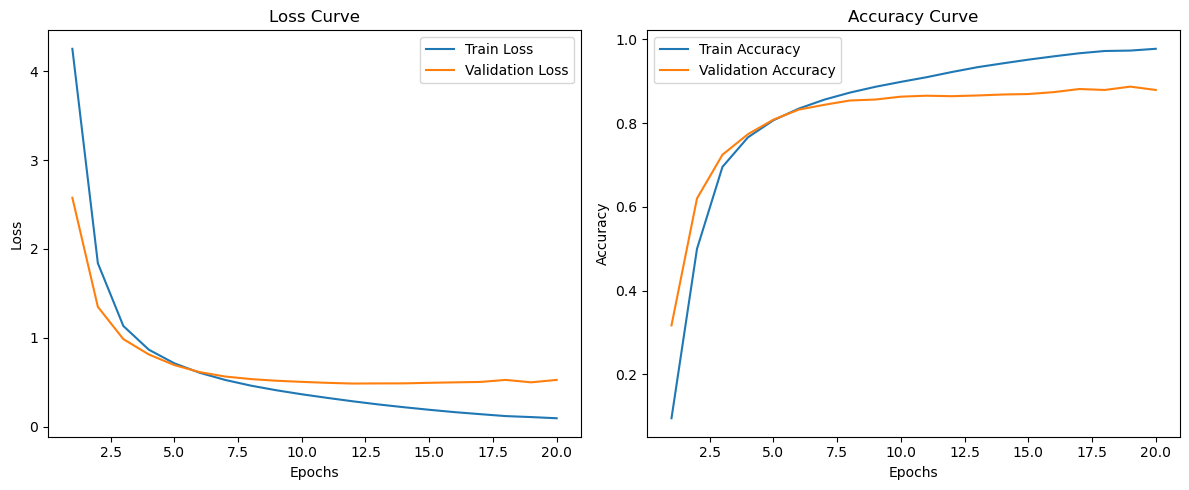

In [21]:
import matplotlib.pyplot as plt

# --- Plotting Section ---
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

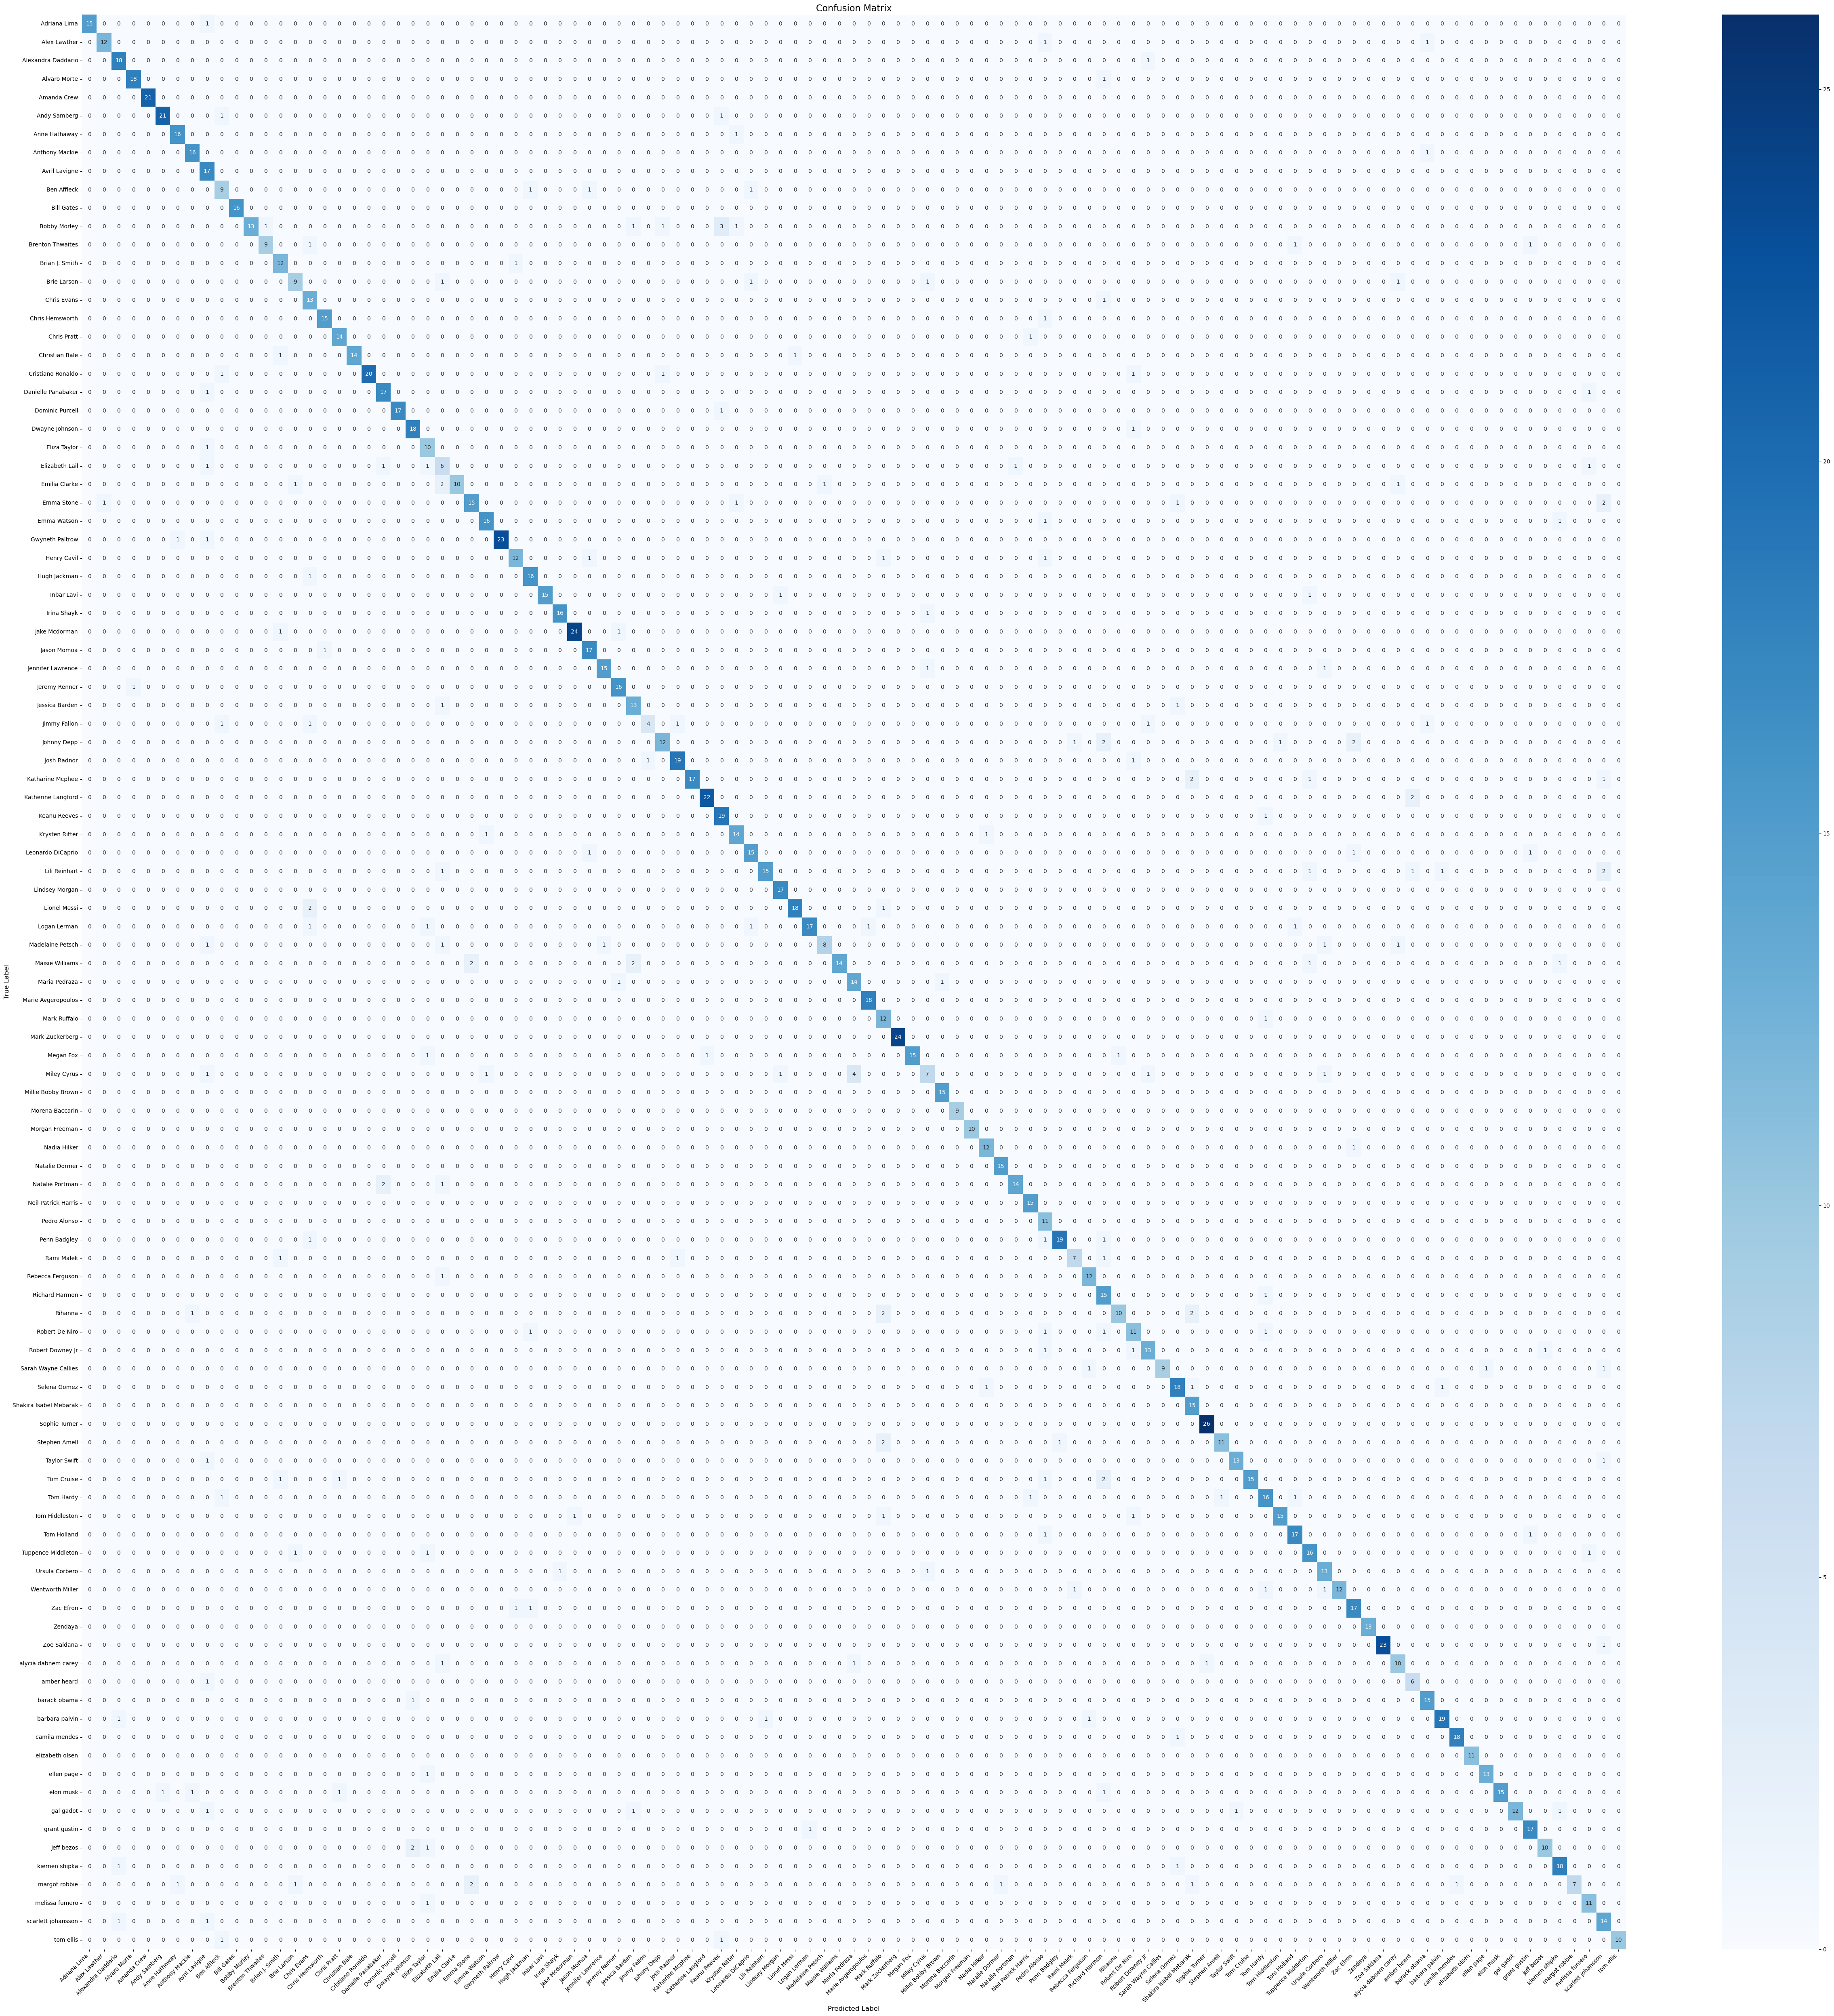

In [22]:
import seaborn as sns
class_names = label_encoder.classes_
plt.figure(figsize=(50, 50))
sns.heatmap(confusion_matrix(true_labels, predicted_labels, labels=class_names), annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

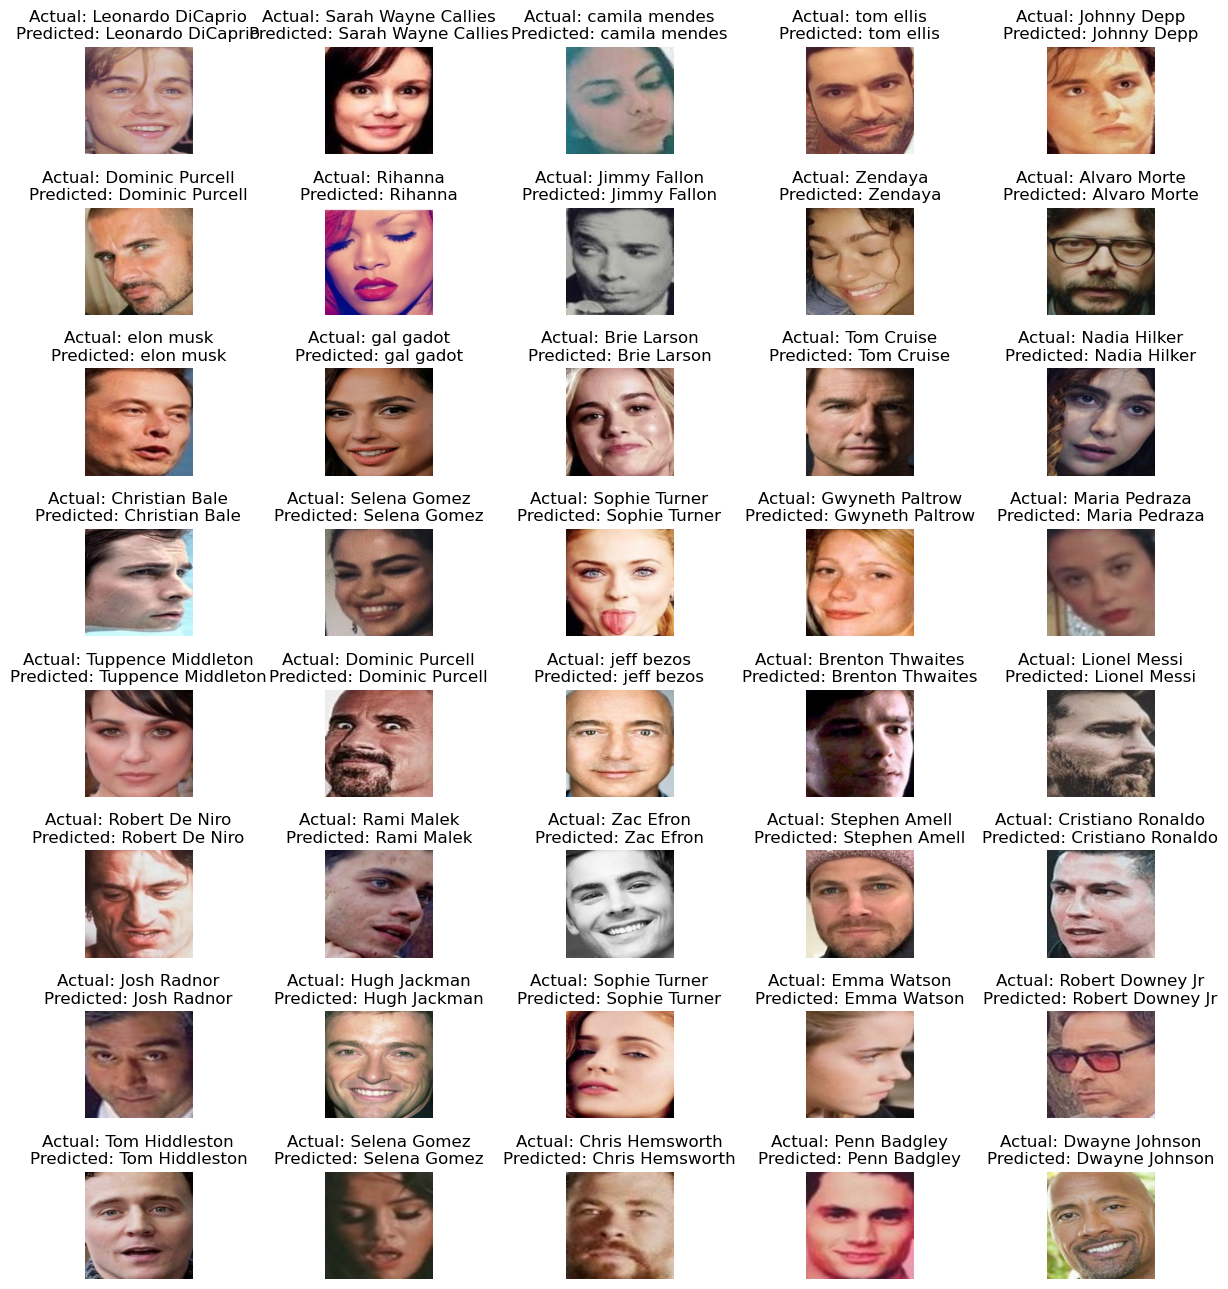

In [23]:
test_folder = './data/working/extracted_embeddings_test'
image_folder = './data/working/train_detected_faces'

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, model, label_encoder, device):
    predictions = []
    if not os.path.exists(test_folder):
        print(f"Error: Test folder not found at '{test_folder}'")
        return predictions

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for label_folder in os.listdir(test_folder):
            label_path = os.path.join(test_folder, label_folder)
            if not os.path.isdir(label_path):
                continue

            for file_name in os.listdir(label_path):
                if not file_name.endswith(".npy"):
                    continue
                
                file_path = os.path.join(label_path, file_name)
                try:
                    # 1. Load the NumPy embedding
                    embedding = np.load(file_path)
                    
                    # 2. Convert NumPy array to PyTorch tensor
                    embedding_tensor = torch.tensor(embedding, dtype=torch.float32)
                    
                    # 3. Add a batch dimension and send to the correct device
                    input_tensor = embedding_tensor.unsqueeze(0).to(device)
                    
                    # 4. Get model output
                    output = model(input_tensor)
                    
                    # 5. Get the predicted class index
                    predicted_label_idx = torch.argmax(output, dim=1).item()
                    predicted_label = label_encoder.inverse_transform([predicted_label_idx])[0]
                    
                    predictions.append((file_name, label_folder, predicted_label))

                except Exception as e:
                    print(f"Could not process file {file_name}. Reason: {e}")
    
    return predictions

def display_random_images(predictions, image_folder, num_images=40):
    selected_predictions = random.sample(predictions, min(num_images, len(predictions)))
    
    # Calculate the number of rows and columns based on the desired number of images
    num_rows = (num_images + 4) // 5  # Ensure at least 1 row
    num_cols = min(5, num_images)  # Maximum of 5 columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

    for i, (file_name, actual_label, predicted_label) in enumerate(selected_predictions):
        # Extract identifier from the file name
        identifier_start = file_name.find("_detected_face_") + len("_detected_face_")
        identifier_end = file_name.find("_", identifier_start)
        if identifier_end == -1:
            identifier = file_name[identifier_start:]
        else:
            identifier = file_name[identifier_start:identifier_end]

        # Construct the file path for the corresponding image
        image_name = f"detected_face_{identifier}.jpg"
        image_path = os.path.join(image_folder, actual_label, image_name)

        # Display the actual image along with labels
        try:
            image = Image.open(image_path)
            axes[i // 5, i % 5].imshow(image)
            axes[i // 5, i % 5].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            axes[i // 5, i % 5].axis('off')

        except FileNotFoundError:
            print(f"Image not found for {identifier}. Skipping to the next one.")

    plt.show()

predictions = recognize_faces(test_folder, model.to('mps'), label_encoder, 'mps')
display_random_images(predictions, image_folder, 40)
